In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pathlib import Path
import math
%matplotlib inline

%cd ..
# Check the current working directory
print("Current Working Directory:", Path.cwd())

# Adjust the relative path based on your project structure
filepath = Path("data/raw/train.csv")
filepath_test = Path("data/raw/test.csv")

# Read the CSV file
df = pd.read_csv(filepath)


df_test = pd.read_csv(filepath_test)

# Display the first few rows of the DataFrame
df_test.head()


/Users/siddhant/nycproj/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Users/siddhant/nycproj/nyctaxitrip
Current Working Directory: /Users/siddhant/nycproj/nyctaxitrip


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [2]:
import warnings

warnings.filterwarnings("ignore")


In [3]:
df = df.astype({"pickup_datetime":"datetime64[ns]", "dropoff_datetime":"datetime64[ns]"})
df_test = df_test.astype({"pickup_datetime":"datetime64[ns]"})

In [4]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


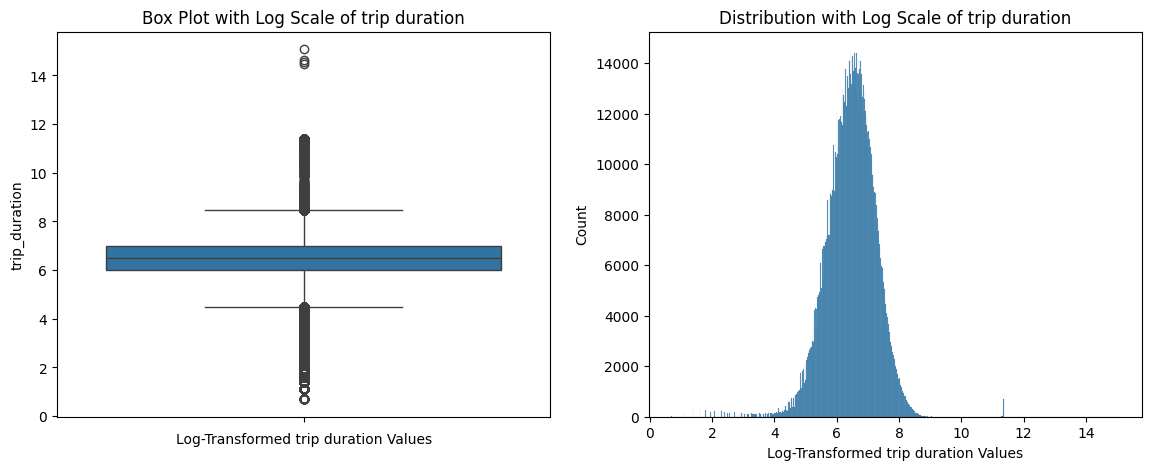

In [5]:
# LOG NORMAL DISTRIBUTION OF TARGET VARIABLE

fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.boxplot(np.log1p(df['trip_duration']), ax=ax[0])
ax[0].set_xlabel('Log-Transformed trip duration Values')
ax[0].set_title('Box Plot with Log Scale of trip duration')


sns.histplot(np.log1p(df["trip_duration"]), ax=ax[1]) 
ax[1].set_xlabel('Log-Transformed trip duration Values')
ax[1].set_title('Distribution with Log Scale of trip duration')


plt.show()


In [6]:
df["vendor_id"].value_counts()

vendor_id
2    780302
1    678342
Name: count, dtype: int64

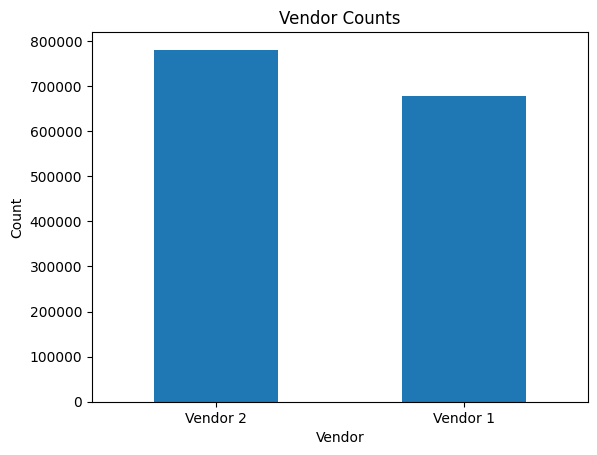

In [7]:
# NUMBER OF RIDES FOR EACH VENDOR
vendor_count = df["vendor_id"].value_counts()
vendor_count = vendor_count.rename({1:"Vendor 1", 2:"Vendor 2"})

vendor_count.plot(kind='bar', rot=0, xlabel='Vendor', ylabel='Count', title='Vendor Counts')

plt.show()

In [8]:
# CONVERTING LATITUDE AND LONGITUDE TO NUMERIC 
df = df.astype({'pickup_longitude': 'int64', 'pickup_latitude': 'int64', 'dropoff_longitude': 'int64', 'dropoff_latitude': 'int64'})
df_test = df_test.astype({'pickup_longitude': 'int64', 'pickup_latitude': 'int64', 'dropoff_longitude': 'int64', 'dropoff_latitude': 'int64'})
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  int64         
 5   pickup_latitude     625134 non-null  int64         
 6   dropoff_longitude   625134 non-null  int64         
 7   dropoff_latitude    625134 non-null  int64         
 8   store_and_fwd_flag  625134 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 42.9+ MB


In [9]:
# CREATING A COPY OF MAIN DATAFRAME AS TO KEP ORIGNAL DATA HANDY
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  int64         
 6   pickup_latitude     1458644 non-null  int64         
 7   dropoff_longitude   1458644 non-null  int64         
 8   dropoff_latitude    1458644 non-null  int64         
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), int64(7), object(2)
memory usage: 122.4+ MB


In [10]:
# CREATING NEW FEATURES
def new_features(dataframe, date1):
    
    dataframe["Year"] = dataframe[date1].dt.year
    dataframe["Month"] = dataframe[date1].dt.month
    dataframe["Pickup Day"] = dataframe[date1].dt.day
    dataframe["Day Name"] = dataframe[date1].dt.day_name()
    dataframe["Pickup hours"] = dataframe[date1].dt.hour
    
    
    # Converting trip journey from seconds to minutes
    # dataframe["journey_mins"] = dataframe[y] / 60
    
    return dataframe.head()

# Assuming 'df1' is your DataFrame and 'pickup_datetime' is the column with date and time information
new_features(df1, 'pickup_datetime')


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Year,Month,Pickup Day,Day Name,Pickup hours
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73,40,-73,40,N,455,2016,3,14,Monday,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73,40,-73,40,N,663,2016,6,12,Sunday,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73,40,-74,40,N,2124,2016,1,19,Tuesday,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74,40,-74,40,N,429,2016,4,6,Wednesday,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73,40,-73,40,N,435,2016,3,26,Saturday,13


In [11]:
# CALCULATING THE DISTANCES OF TRIPS FROM THE LATITUDES AND LONGITUDES
# from geopy.distance import great_circle
from math import radians, sin, cos, sqrt, atan2

def distances(row):
    r = 6371
    
    lon1 = radians(row["pickup_longitude"])
    lat1 = radians(row["pickup_latitude"])
    lon2 = radians(row["dropoff_longitude"])
    lat2 = radians(row["dropoff_latitude"])
    
    diff_lon = lon2 - lon1
    diff_lat = lat2 - lat1
    

    a = sin(diff_lat/2) ** 2 + cos(lat1) * cos(lat2) * sin(diff_lon/2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    Distance = r * c 
    
    return Distance

df1["haversine_distance"] = df1.apply(distances, axis=1)
df1["journey_mins"] = df1["trip_duration"]/60
df1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Year,Month,Pickup Day,Day Name,Pickup hours,haversine_distance,journey_mins
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73,40,-73,40,N,455,2016,3,14,Monday,17,0.000000,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73,40,-73,40,N,663,2016,6,12,Sunday,0,0.000000,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73,40,-74,40,N,2124,2016,1,19,Tuesday,11,85.179809,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74,40,-74,40,N,429,2016,4,6,Wednesday,19,0.000000,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73,40,-73,40,N,435,2016,3,26,Saturday,13,0.000000,7.250000


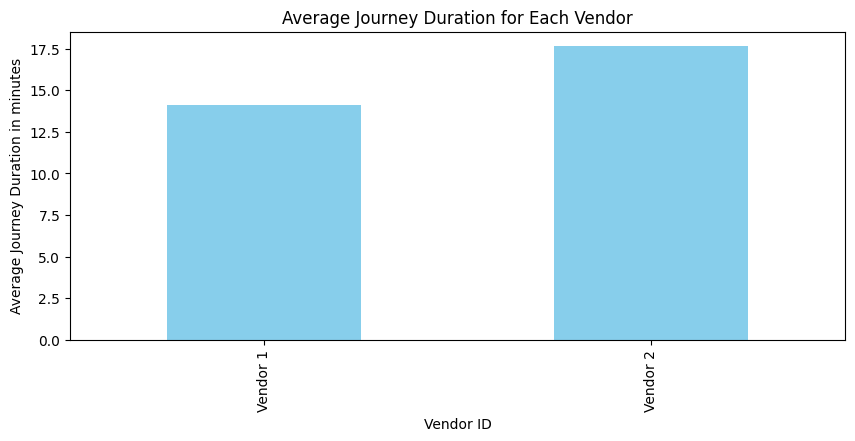

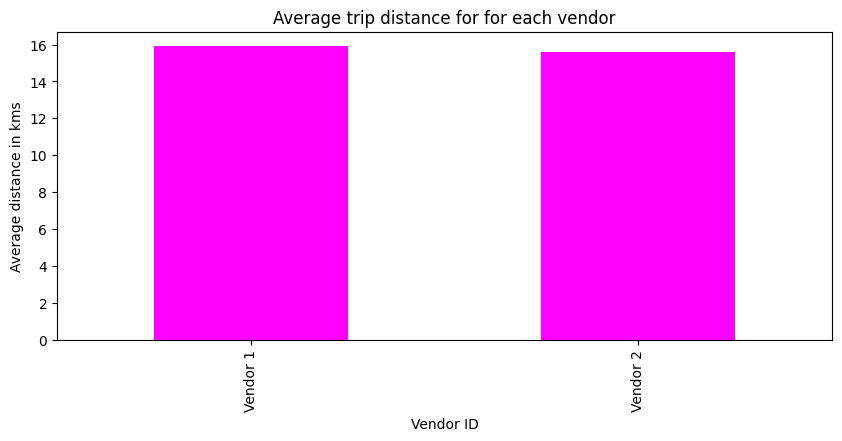

In [12]:
# FINDING AVERAGE TRIP DURATION FOR EACH VENDOR
grouped_vendor = df1.groupby("vendor_id")["journey_mins"].mean()
grouped_vendor1 = df1.groupby("vendor_id")["haversine_distance"].mean()

# Create the first plot for Average Journey Duration
fig, ax1 = plt.subplots(figsize=(10, 4))
grouped_vendor.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_xlabel("Vendor ID")
ax1.set_ylabel("Average Journey Duration in minutes")
ax1.set_title("Average Journey Duration for Each Vendor")
ax1.set_xticklabels([f"Vendor {vendor_id}" for vendor_id in grouped_vendor.index])

# Create the second plot for Average trip distance
fig, ax2 = plt.subplots(figsize=(10, 4))
grouped_vendor1.plot(kind='bar', ax=ax2, color='magenta')
ax2.set_xlabel("Vendor ID")
ax2.set_ylabel("Average distance in kms")
ax2.set_title("Average trip distance for for each vendor")
ax2.set_xticklabels([f"Vendor {vendor_id}" for vendor_id in grouped_vendor.index])

# Show the plots
plt.show()




1. From the first graph we see that there a good difference in the average duration for journey's between two vendors. The average journey duration for vendor 2 is 16 minutes which is higher than the average journey duration of vendor 1 which is approximately 13 minutes.

2. The graph 2 compares average trip distance for each vendor and we see that the difference between both teh vendors is veruy negligible.

In [13]:
outliers = df1[["journey_mins"]]

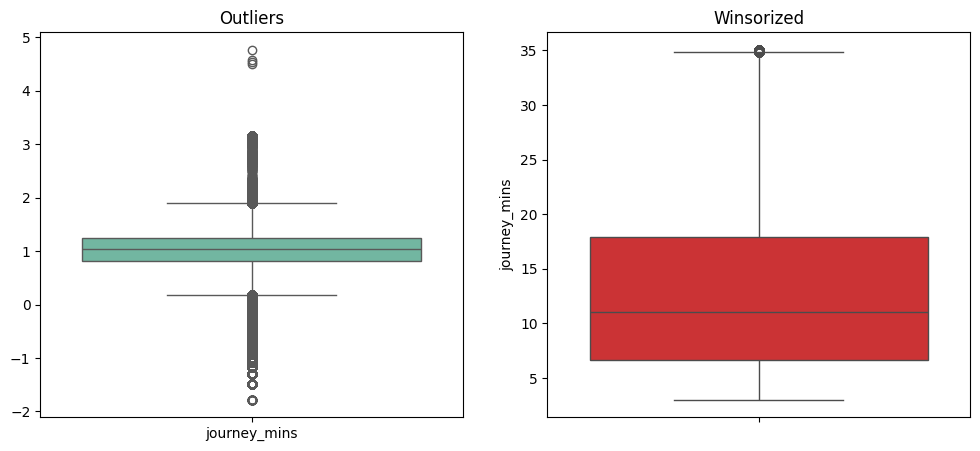

In [14]:
# DEALING WITH OUTLIERS IN TARGET COLUMN
def winsorizer(df, col, up_lim, low_lim):
    upper = np.percentile(df[col], up_lim)
    lower = np.percentile(df[col], low_lim)
    
    df[col] = np.where(df[col] > upper, upper, 
                       np.where(df[col] < lower, lower, df[col]))
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.boxplot(data=np.log10(outliers), fill=True, ax=ax[0],palette="Set2")
    ax[0].set_title("Outliers")
    
    sns.boxplot(data=df[col], fill=True, ax=ax[1], palette="Set1")
    ax[1].set_title("Winsorized")
    
    plt.show()

winsorizer(df1, "journey_mins", 95, 5)



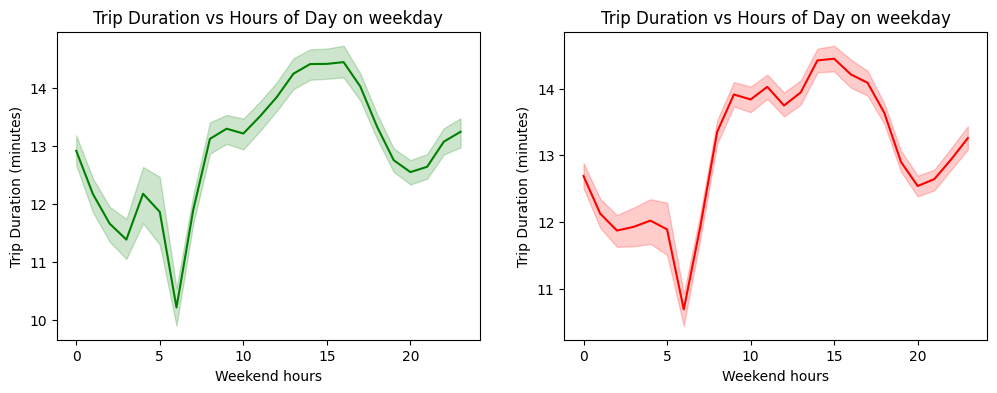

In [15]:
# IDENTIFYING THE BUSSIEST HOURS OF THE DAY
weekend = df1[df1["Pickup Day"].isin([5,6])]
weekday = df1[df1["Pickup Day"].isin([0,1,2,3,4])]

fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.lineplot(x=weekend["Pickup hours"], y=weekend["journey_mins"], ax=ax[0], color = "green")
ax[0].set_xlabel("Weekend hours")
ax[0].set_ylabel("Trip Duration (minutes)")
ax[0].set_title("Trip Duration vs Hours of Day on weekday")

sns.lineplot(x=weekday["Pickup hours"], y=weekday["journey_mins"], ax=ax[1], color = "red")
ax[1].set_xlabel("Weekend hours")
ax[1].set_ylabel("Trip Duration (minutes)")
ax[1].set_title("Trip Duration vs Hours of Day on weekday")
plt.show()

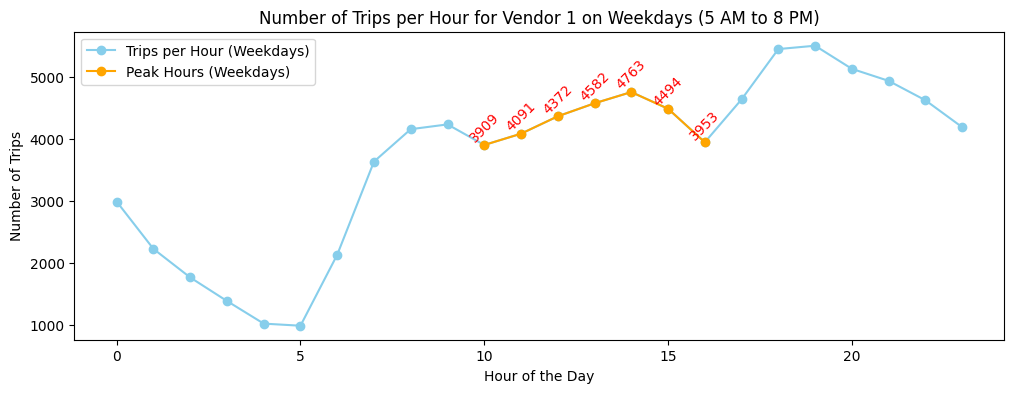

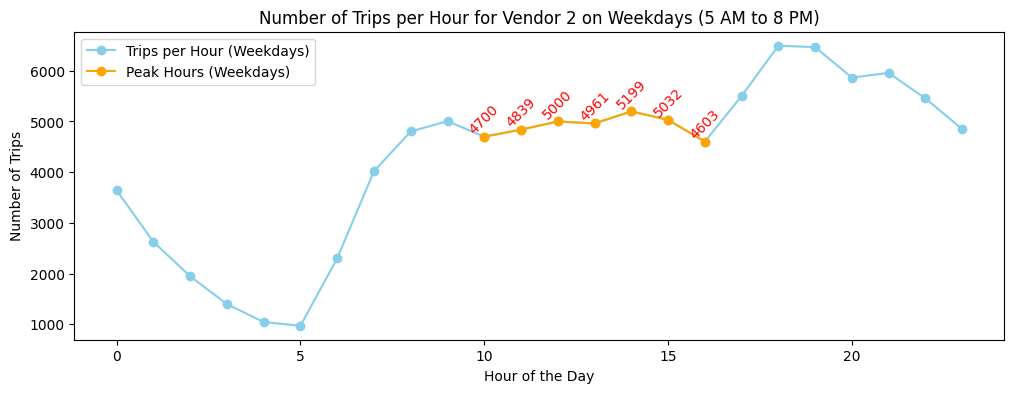

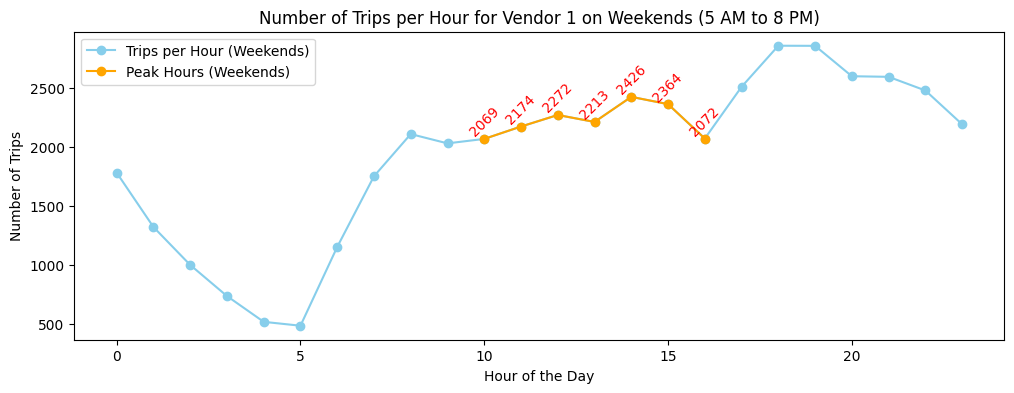

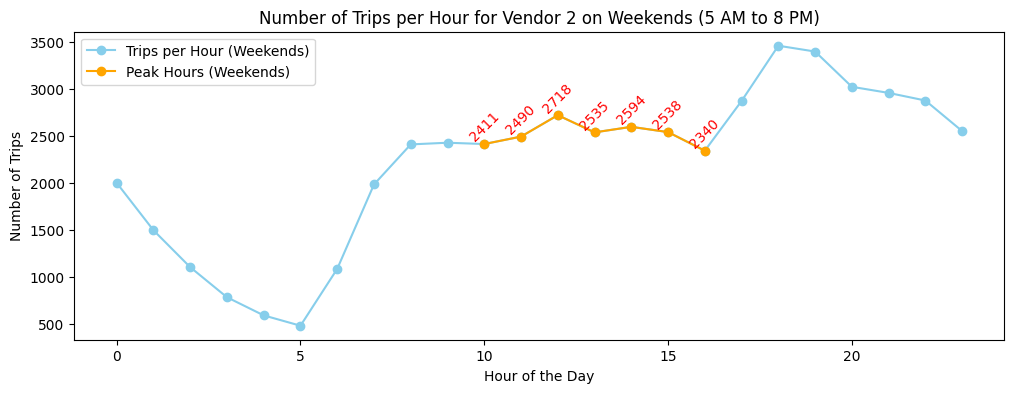

In [16]:


# Step 1: Filter the Data for Weekdays (0-4) and Weekends (5-6)
weekday_data = df1[df1['Pickup Day'].isin([0, 1, 2, 3, 4])]
weekend_data = df1[df1['Pickup Day'].isin([5, 6])]

# Step 2: Group by Vendor ID and Hour for Weekdays
weekday_grouped_trips = weekday_data.groupby(['vendor_id', 'Pickup hours'])
weekday_trips_per_vendor_hour = weekday_grouped_trips.size().unstack()

# Step 3: Group by Vendor ID and Hour for Weekends
weekend_grouped_trips = weekend_data.groupby(['vendor_id', 'Pickup hours'])
weekend_trips_per_vendor_hour = weekend_grouped_trips.size().unstack()

# Step 4: Plot the Results for Weekdays using Line Plot with Specific Y-axis Range
for vendor_id in weekday_trips_per_vendor_hour.index:
    trips_per_hour = weekday_trips_per_vendor_hour.loc[vendor_id]
    
    # Increase figure size for each individual plot
    plt.figure(figsize=(12, 4))
    
    # Highlight the peak hours (10 AM to 5 PM) with a different line style
    highlight_mask = (trips_per_hour.index >= 10) & (trips_per_hour.index < 17)
    
    trips_per_hour.plot(marker='o', linestyle='-', color='skyblue', label='Trips per Hour (Weekdays)')
    
    # Highlight the peak hours with a different line style
    plt.plot(trips_per_hour.index[highlight_mask], trips_per_hour[highlight_mask], marker='o', linestyle='-', color='orange', label='Peak Hours (Weekdays)')
    
    # Annotate the peak hours with slightly rotated text for better visibility
    for hour in trips_per_hour.index[highlight_mask]:
        plt.text(hour, trips_per_hour[hour] + 1, str(trips_per_hour[hour]), ha='center', va='bottom', color='red', rotation=45)
    
      # Set y-axis range (adjust the values as needed)
    
    plt.title(f'Number of Trips per Hour for Vendor {vendor_id} on Weekdays (5 AM to 8 PM)')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Trips')
    plt.legend()
    plt.show()

# Step 5: Plot the Results for Weekends using Line Plot with Specific Y-axis Range
for vendor_id in weekend_trips_per_vendor_hour.index:
    trips_per_hour = weekend_trips_per_vendor_hour.loc[vendor_id]
    
    # Increase figure size for each individual plot
    plt.figure(figsize=(12, 4))
    
    # Highlight the peak hours (10 AM to 5 PM) with a different line style
    highlight_mask = (trips_per_hour.index >= 10) & (trips_per_hour.index < 17)
    
    trips_per_hour.plot(marker='o', linestyle='-', color='skyblue', label='Trips per Hour (Weekends)')
    
    # Highlight the peak hours with a different line style
    plt.plot(trips_per_hour.index[highlight_mask], trips_per_hour[highlight_mask], marker='o', linestyle='-', color='orange', label='Peak Hours (Weekends)')
    
    # Annotate the peak hours with slightly rotated text for better visibility
    for hour in trips_per_hour.index[highlight_mask]:
        plt.text(hour, trips_per_hour[hour] + 1, str(trips_per_hour[hour]), ha='center', va='bottom', color='red', rotation=45)
    
      # Set y-axis range (adjust the values as needed)
    
    plt.title(f'Number of Trips per Hour for Vendor {vendor_id} on Weekends (5 AM to 8 PM)')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Trips')
    plt.legend()
    plt.show()


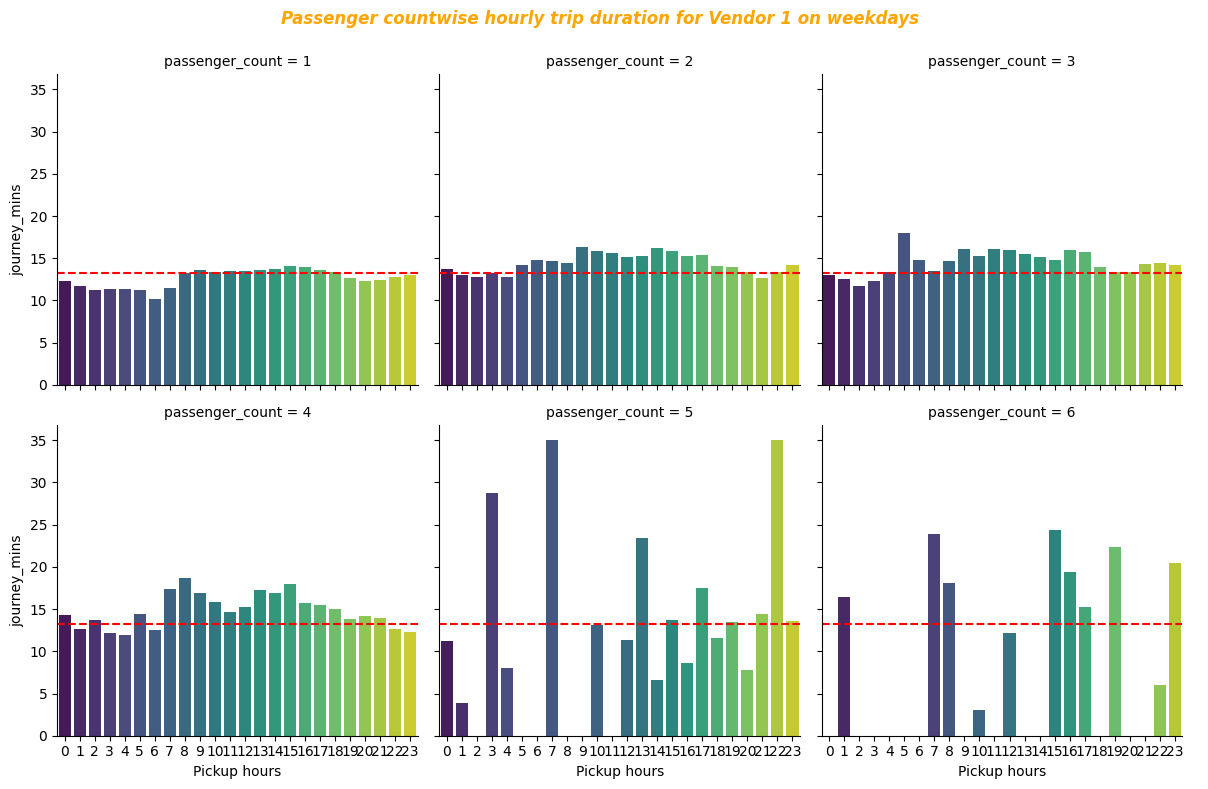

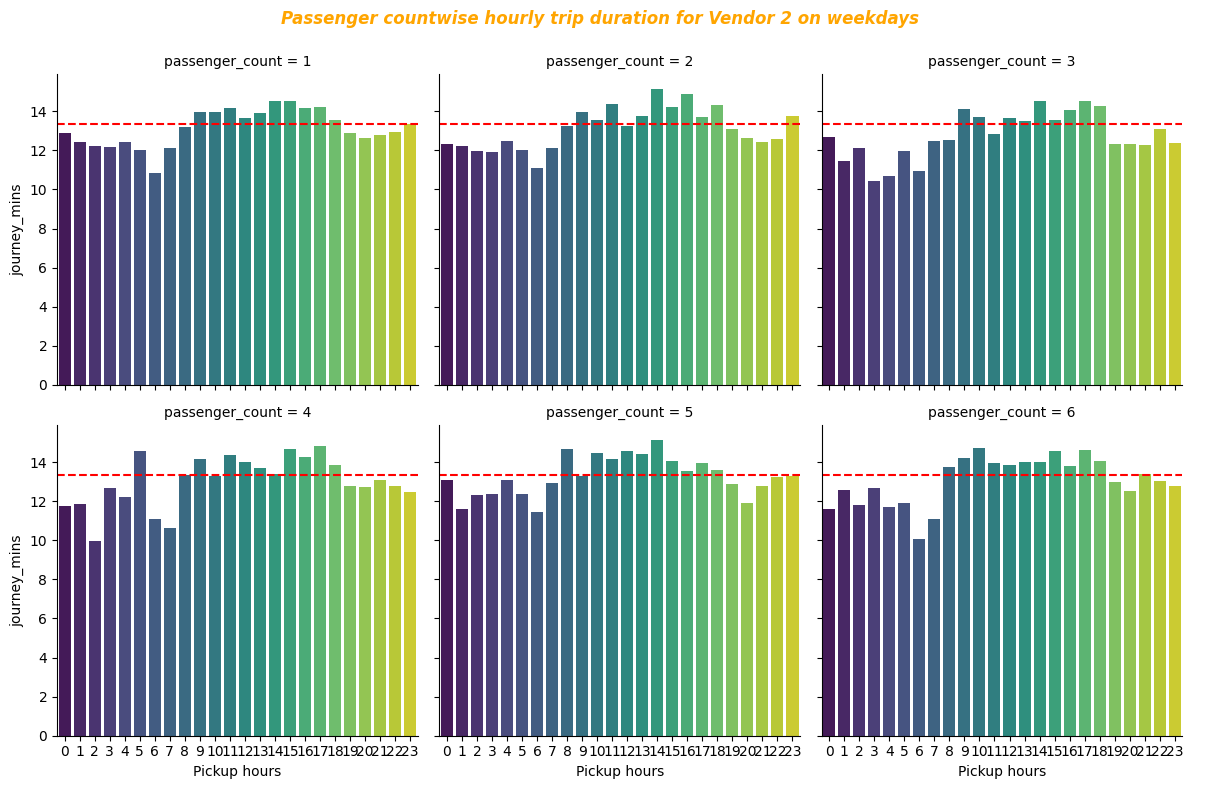

In [17]:
# PASSENGER WISE HOURLY TRIP DURATION FOR EACH VENDOR ON WEEKDAYS
filter_weekday = weekday[weekday["passenger_count"].isin([1,2,3,4,5,6])]
weekday_group = filter_weekday.groupby("vendor_id")

for index, (vendor_id, grp) in enumerate(weekday_group):
    f = sns.FacetGrid(grp, col='passenger_count', col_wrap=3, height=4)
    f.map(sns.barplot, 'Pickup hours', 'journey_mins', palette='viridis', ci=None)
    
    for ax in f.axes.flat:
        ax.axhline(y=grp["journey_mins"].mean(), color='red', linestyle='--', label=f'Mean for Vendor {vendor_id}')
        

    # Adjust layout to accommodate title and legend
    f.fig.suptitle(f'Passenger countwise hourly trip duration for Vendor {vendor_id} on weekdays', color = "orange", style = "oblique", fontweight = "bold")
    f.fig.subplots_adjust(top=0.9)
    f.add_legend()

# Show the plot
plt.show()

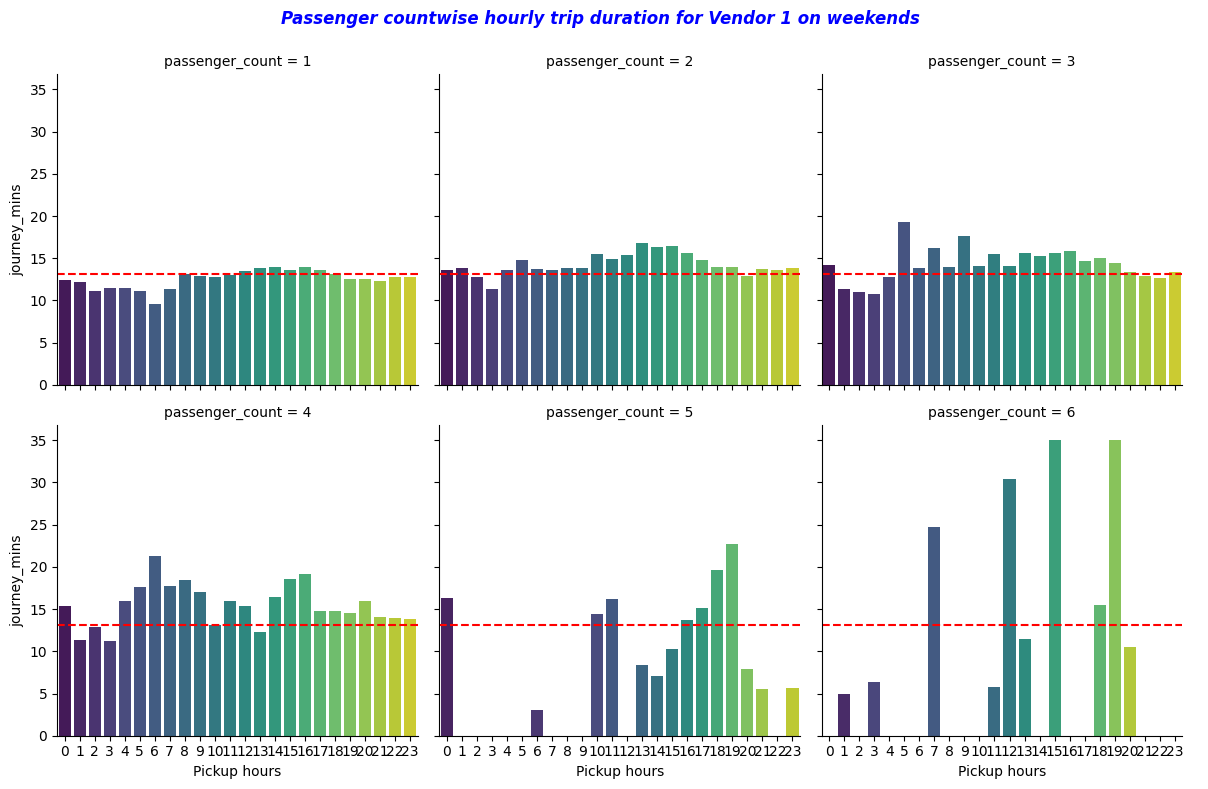

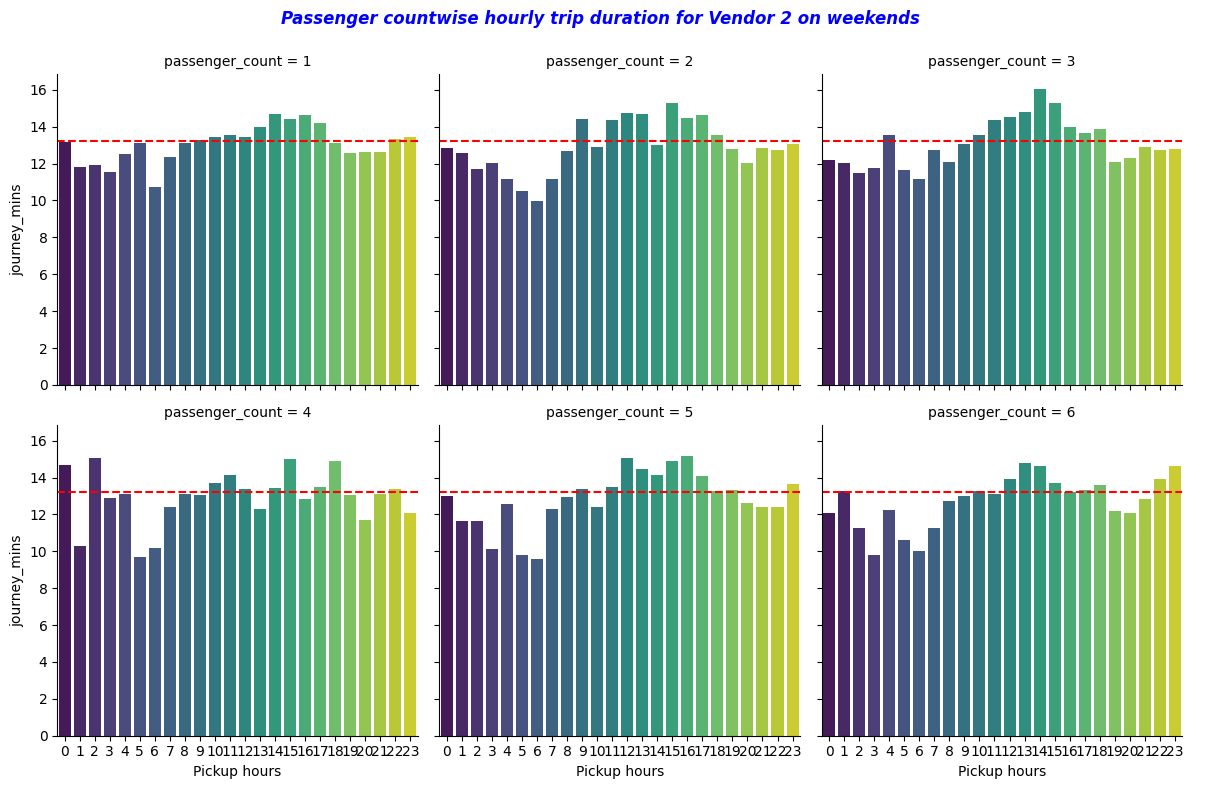

In [18]:
# PASSENGER WISE HOURLY TRIP DURATION FOR EACH VENDOR ON WEEKENDS
filter_weekend = weekend[weekend["passenger_count"].isin([1,2,3,4,5,6])]
weekend_group = filter_weekend.groupby("vendor_id")

for index, (vendor_id, group) in enumerate(weekend_group):
    f = sns.FacetGrid(group, col='passenger_count', col_wrap=3, height=4)
    f.map(sns.barplot, 'Pickup hours', 'journey_mins', palette='viridis', ci=None)
    
    for ax in f.axes.flat:
        ax.axhline(y=group["journey_mins"].mean(), color='red', linestyle='--', label=f'Mean for Vendor {vendor_id}')

    # Adjust layout to accommodate title and legend
    f.fig.suptitle(f'Passenger countwise hourly trip duration for Vendor {vendor_id} on weekends', color = "blue", style = "oblique", fontweight = "bold")
    f.fig.subplots_adjust(top=0.9)
    f.add_legend()

# Show the plot
plt.show()

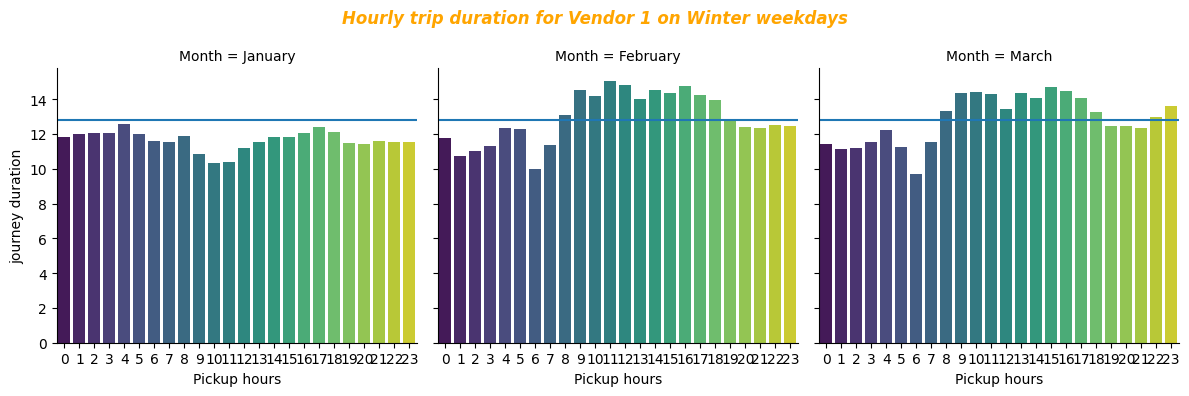

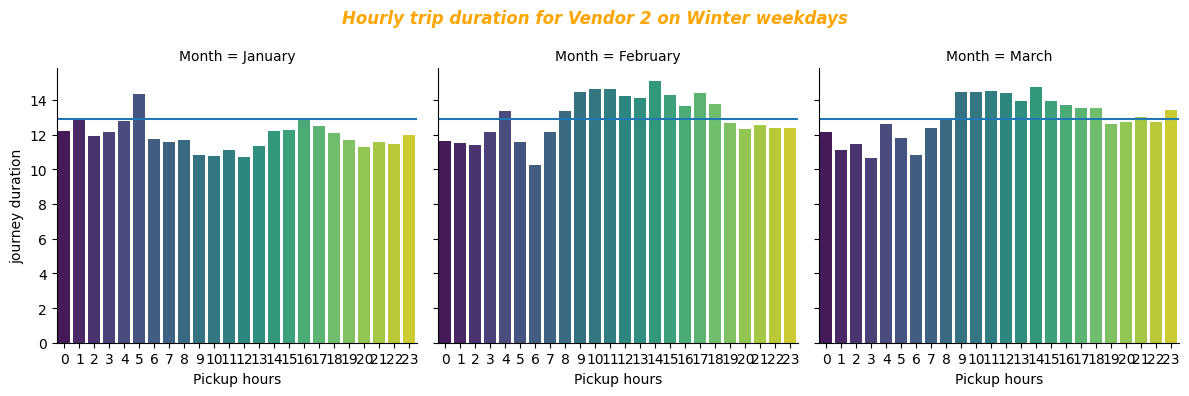

In [19]:
# HOURLY TRIP DURATIONS FOR WINTER WEEKDAYS 
winter_months_weekday = weekday[weekday["Month"].isin([1,2,3])]
winter_months_weekday_group = winter_months_weekday.groupby("vendor_id")

month_name_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June'}

for index, (vendor_id, group) in enumerate(winter_months_weekday_group):
    
    group["Month"] = group["Month"].map(month_name_mapping)
    
    g = sns.FacetGrid(group, col="Month", col_wrap=3, height=4)
    g.map(sns.barplot, "Pickup hours", "journey_mins", palette = "viridis", ci=None)    

    for axes in g.axes.flat:
        axes.axhline(group["journey_mins"].mean())
        axes.set_xlabel("Pickup hours")
        axes.set_ylabel("journey duration")

    g.fig.suptitle(f"Hourly trip duration for Vendor {vendor_id} on Winter weekdays", color = "orange", style = "oblique", fontweight = "bold")
    g.fig.tight_layout()
    g.fig.show()

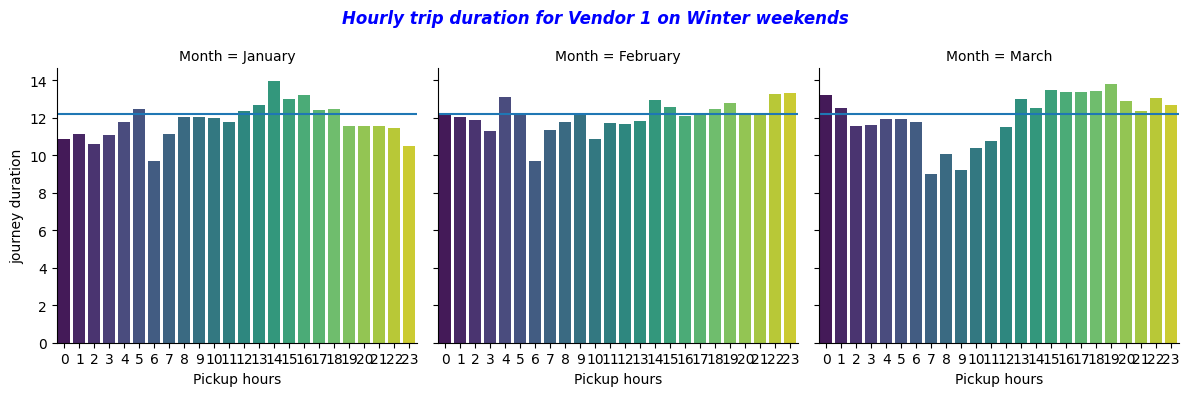

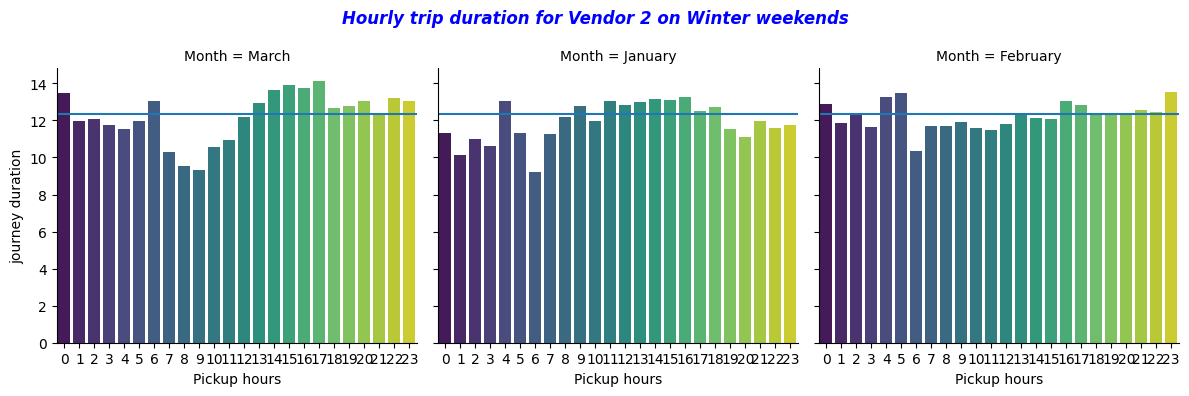

In [20]:
# HOURLY TRIP DURATIONS FOR WINTER WEEKENDS
winter_months_weekend = weekend[weekend["Month"].isin([1,2,3])]
winter_months_weekend_group = winter_months_weekend.groupby("vendor_id")

for index, (vendor_id, group) in enumerate(winter_months_weekend_group):
    
    group["Month"] = group["Month"].map(month_name_mapping)
    
    g = sns.FacetGrid(group, col="Month", col_wrap=3, height=4)
    g.map(sns.barplot, "Pickup hours", "journey_mins", palette = "viridis", ci=None)    

    for axes in g.axes.flat:
        axes.axhline(group["journey_mins"].mean())
        axes.set_xlabel("Pickup hours")
        axes.set_ylabel("journey duration")

    g.fig.suptitle(f"Hourly trip duration for Vendor {vendor_id} on Winter weekends", color = "blue", style = "oblique", fontweight = "bold")
    g.fig.tight_layout()
    g.fig.show()

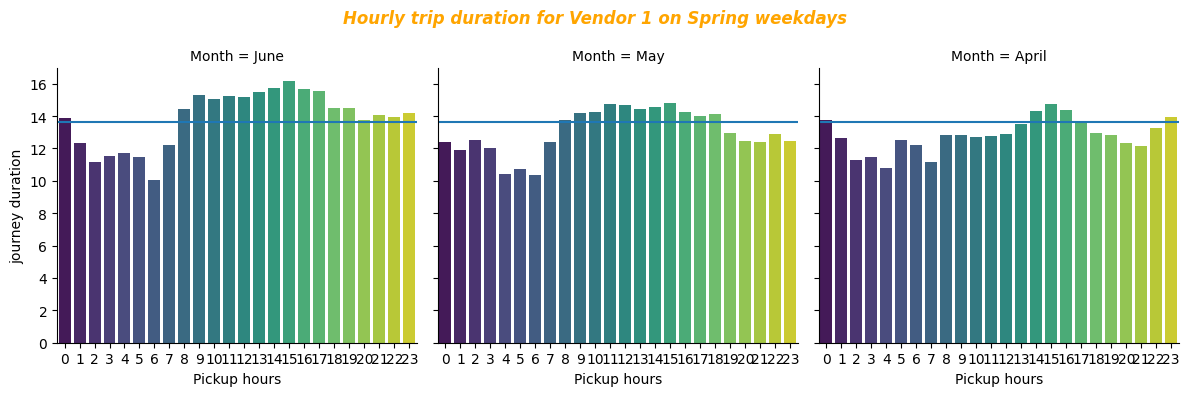

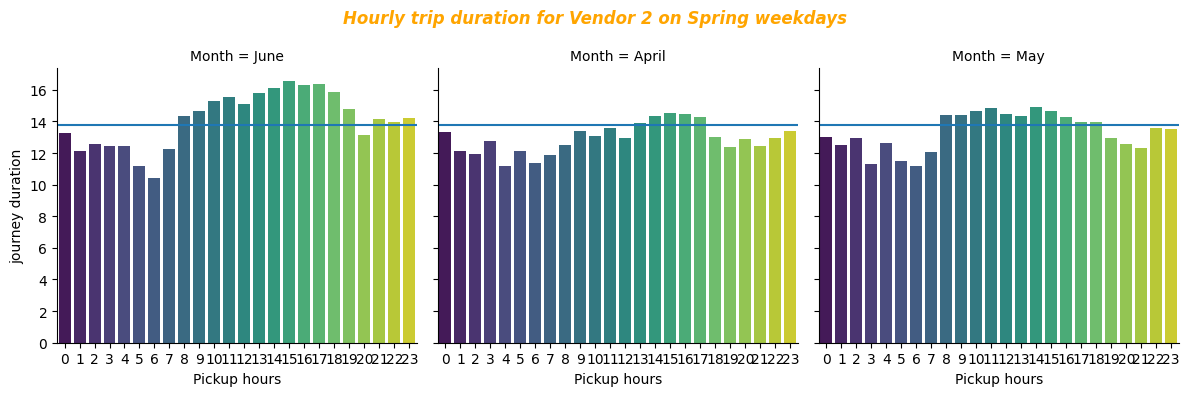

In [21]:
# HOURLY TRIP DURATIONS FOR SPRING WEEKDAYS 
spring_months_weekday = weekday[weekday["Month"].isin([4,5,6])]
spring_months_weekday_group = spring_months_weekday.groupby("vendor_id")

for index, (vendor_id, group) in enumerate(spring_months_weekday_group):
    
    group["Month"] = group["Month"].map(month_name_mapping)
    
    g = sns.FacetGrid(group, col="Month", col_wrap=3, height=4)
    g.map(sns.barplot, "Pickup hours", "journey_mins", palette = "viridis", ci=None)    

    for axes in g.axes.flat:
        axes.axhline(group["journey_mins"].mean())
        axes.set_xlabel("Pickup hours")
        axes.set_ylabel("journey duration")

    g.fig.suptitle(f"Hourly trip duration for Vendor {vendor_id} on Spring weekdays", color = "orange", style = "oblique", fontweight = "bold")
    g.fig.tight_layout()
    g.fig.show()

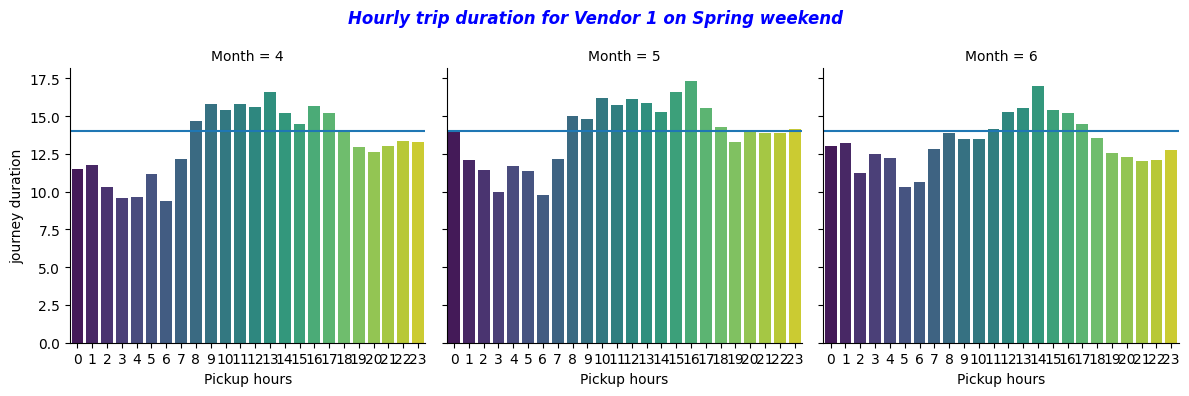

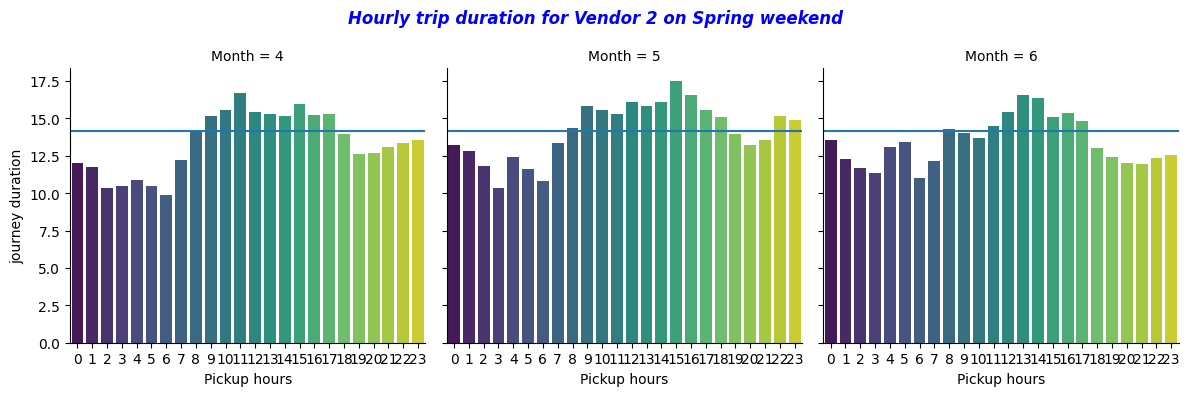

In [22]:
# HOURLY TRIP DURATIONS FOR SPRING WEEKENDS 
spring_months_weekend = weekend[weekend["Month"].isin([4,5,6])]
spring_months_weekend_group = spring_months_weekend.groupby("vendor_id")

for index, (vendor_id, group) in enumerate(spring_months_weekend_group):
    g = sns.FacetGrid(group, col="Month", col_wrap=3, height=4)
    g.map(sns.barplot, "Pickup hours", "journey_mins", palette = "viridis", ci=None)    

    for axes in g.axes.flat:
        axes.axhline(group["journey_mins"].mean())
        axes.set_xlabel("Pickup hours")
        axes.set_ylabel("journey duration")

    g.fig.suptitle(f"Hourly trip duration for Vendor {vendor_id} on Spring weekend", color = "blue", style = "oblique", fontweight = "bold")
    g.fig.tight_layout()
    g.fig.show()

In [42]:
# BUILDING FEATURES
dataframe_train2 = df.copy()

dataframe_train2["pickup_datetime"] = pd.to_datetime(dataframe_train2["pickup_datetime"])

new_features(dataframe_train2, "pickup_datetime")
dataframe_train2["Distance"] = dataframe_train2.apply(distances, axis=1)

dataframe_train_y1 = dataframe_train2["trip_duration"]
dataframe_train2.drop(columns=["id","pickup_datetime","dropoff_datetime","pickup_latitude", "pickup_longitude",
                      "dropoff_latitude", "dropoff_longitude", "trip_duration"], inplace=True)



dataframe_train2.head()

,vendor_id,passenger_count,store_and_fwd_flag,Year,Month,Pickup Day,Day Name,Pickup hours,Distance
0,2,1,N,2016,3,14,Monday,17,0.000000
1,1,1,N,2016,6,12,Sunday,0,0.000000
2,2,1,N,2016,1,19,Tuesday,11,85.179809
3,2,1,N,2016,4,6,Wednesday,19,0.000000
4,2,1,N,2016,3,26,Saturday,13,0.000000


In [43]:
len(dataframe_train_y1)

1458644

In [44]:
encodeXtrain = pd.get_dummies(dataframe_train2, columns=["store_and_fwd_flag", "Day Name"], dtype = int)
encodeXtrain.head()

,vendor_id,passenger_count,Year,Month,Pickup Day,Pickup hours,Distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day Name_Friday,Day Name_Monday,Day Name_Saturday,Day Name_Sunday,Day Name_Thursday,Day Name_Tuesday,Day Name_Wednesday
0,2,1,2016,3,14,17,0.000000,1,0,0,1,0,0,0,0,0
1,1,1,2016,6,12,0,0.000000,1,0,0,0,0,1,0,0,0
2,2,1,2016,1,19,11,85.179809,1,0,0,0,0,0,0,1,0
3,2,1,2016,4,6,19,0.000000,1,0,0,0,0,0,0,0,1
4,2,1,2016,3,26,13,0.000000,1,0,0,0,1,0,0,0,0


In [45]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

scaler = MinMaxScaler()

scaler.set_output(transform="pandas")
scaled_X_train = scaler.fit_transform(encodeXtrain)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X_train, dataframe_train_y1, test_size=0.2, random_state=42)

X_train.head()

,vendor_id,passenger_count,Year,Month,Pickup Day,Pickup hours,Distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day Name_Friday,Day Name_Monday,Day Name_Saturday,Day Name_Sunday,Day Name_Thursday,Day Name_Tuesday,Day Name_Wednesday
1053743,1.0,0.111111,0.0,1.0,0.933333,0.782609,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
273748,1.0,0.111111,0.0,0.6,0.800000,0.565217,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
433988,1.0,0.111111,0.0,0.8,0.200000,0.521739,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1442481,0.0,0.111111,0.0,0.8,0.433333,0.782609,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1025834,1.0,0.111111,0.0,0.6,0.300000,0.956522,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [58]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

rf = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42, ccp_alpha=0.01, bootstrap=True)
XGB = XGBRegressor(n_estimators=10, cv=5, eta=0.1, alpha=0.1)

rf.fit(X_train, y_train)

XGB.fit(X_train, y_train)


predict_rf = rf.predict(X_test)
predict_XGB = XGB.predict(X_test)

print(f"The RMSLE of random forest is {np.sqrt(mean_squared_log_error(y_test, predict_rf))}")
print(f"The RMSLE of xgboost is {np.sqrt(mean_squared_log_error(y_test, predict_XGB))}")

The RMSLE of random forest is 0.8730051921936355
The RMSLE of xgboost is 0.8794126632451096


In [31]:
scaled_X_train_df = pd.DataFrame(scaled_X_train, columns=scaler.feature_names_in_)
scaled_X_train_df.head()

,vendor_id,passenger_count,Year,Month,Pickup Day,Pickup hours,Distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day Name_Friday,Day Name_Monday,Day Name_Saturday,Day Name_Sunday,Day Name_Thursday,Day Name_Tuesday,Day Name_Wednesday
0,1.0,0.111111,0.0,1.0,0.933333,0.782609,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.111111,0.0,0.6,0.800000,0.565217,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.111111,0.0,0.8,0.200000,0.521739,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.111111,0.0,0.8,0.433333,0.782609,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.111111,0.0,0.6,0.300000,0.956522,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
encodeXtest = pd.get_dummies(X_train, columns=["store_and_fwd_flag", "Day Name"], dtype = int)
encodeXtest.head()

,vendor_id,passenger_count,Year,Month,Pickup Day,Pickup hours,Distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day Name_Friday,Day Name_Monday,Day Name_Saturday,Day Name_Sunday,Day Name_Thursday,Day Name_Tuesday,Day Name_Wednesday
1053743,2,1,2016,6,29,18,0.0,1,0,0,0,0,0,0,0,1
273748,2,1,2016,4,25,13,0.0,1,0,0,1,0,0,0,0,0
433988,2,1,2016,5,7,12,0.0,1,0,0,0,1,0,0,0,0
1442481,1,1,2016,5,14,18,0.0,1,0,0,0,1,0,0,0,0
1025834,2,1,2016,4,10,22,0.0,1,0,0,0,0,1,0,0,0


In [33]:
scaler.set_output(transform="pandas")
scaled_X_test = scaler.fit_transform(encodeXtrain)

,vendor_id,passenger_count,Year,Month,Pickup Day,Pickup hours,Distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day Name_Friday,Day Name_Monday,Day Name_Saturday,Day Name_Sunday,Day Name_Thursday,Day Name_Tuesday,Day Name_Wednesday
1053743,1.0,0.111111,0.0,1.0,0.933333,0.782609,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
273748,1.0,0.111111,0.0,0.6,0.800000,0.565217,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
433988,1.0,0.111111,0.0,0.8,0.200000,0.521739,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1442481,0.0,0.111111,0.0,0.8,0.433333,0.782609,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1025834,1.0,0.111111,0.0,0.6,0.300000,0.956522,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1.0,0.222222,0.0,0.4,0.800000,0.304348,0.069501,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1414414,0.0,0.111111,0.0,0.2,0.500000,0.782609,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
131932,1.0,0.111111,0.0,0.0,0.833333,0.826087,0.069501,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
671155,0.0,0.111111,0.0,0.0,0.600000,0.478261,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
scaled_X_test.head()

,vendor_id,passenger_count,Year,Month,Pickup Day,Pickup hours,Distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day Name_Friday,Day Name_Monday,Day Name_Saturday,Day Name_Sunday,Day Name_Thursday,Day Name_Tuesday,Day Name_Wednesday
1053743,1.0,0.111111,0.0,1.0,0.933333,0.782609,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
273748,1.0,0.111111,0.0,0.6,0.800000,0.565217,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
433988,1.0,0.111111,0.0,0.8,0.200000,0.521739,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1442481,0.0,0.111111,0.0,0.8,0.433333,0.782609,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1025834,1.0,0.111111,0.0,0.6,0.300000,0.956522,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


ValueError: Found input variables with inconsistent numbers of samples: [291729, 1166915]

In [36]:
y_train

1053743    1133
273748      887
433988      686
1442481     818
1025834     951
           ... 
259178     1281
1414414     833
131932     1285
671155      389
121958     1570
Name: trip_duration, Length: 1166915, dtype: int64

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73,40,-73,40,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73,40,-73,40,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73,40,-74,40,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74,40,-74,40,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73,40,-73,40,N,435


In [41]:
len(df["trip_duration"])

1458644